In [ ]:
import random

FORWARD = 0
BACKWARD = 1

class DungeonSimulator:
    def __init__(self, length=5, slip=0.1, small=2, large=10):
        self.length = length # Length of the dungeon
        self.slip = slip  # probability of 'slipping' an action OVVERO: il nostro agente prova a fare una azione ma e sfortunato e non va a buon fine e si ritrova dunque ad aver fatto l azione opposta a quella che voleva fare!
        self.small = small  # payout for BACKWARD action
        self.large = large  # payout at end of chain for FORWARD action
        self.state = 0  # Start at beginning of the dungeon

    def take_action(self, action):
        if random.random() < self.slip:
            # agent slipped, reverse action taken
            action = not action
        if action == BACKWARD:
            # BACKWARD: go back to the beginning, get small reward
            reward = self.small
            self.state = 0
        elif action == FORWARD:
            # FORWARD: go up along the dungeon
            if self.state < self.length - 1:
                self.state += 1
                reward = 0
            else:
                reward = self.large
        return self.state, reward

    def reset(self):
        # Reset state to zero, the beginning of the dungeon
        self.state = 0
        return self.state

In [ ]:
class DrunkAgent:
    def __init__(self):
        self.q_table = None

    def get_next_action(self, state):
        # Random walk 50% di probabilita di andare avanti e 50% di probabilita di andare indietro
        return FORWARD if random.random() < 0.5 else BACKWARD

    def update(self, old_state, new_state, action, reward):
        pass # I don't care! I'm drunk!!

In [ ]:
class Accountant:
    def __init__(self):
        # Q-table for rewards accounting
        # Rows are actions, columns are states
        self.q_table = [[0,0,0,0,0], [0,0,0,0,0]]

    def get_next_action(self, state):
        # Is FORWARD reward is bigger?
        if self.q_table[FORWARD][state] > self.q_table[BACKWARD][state]:
            return FORWARD

        # Is BACKWARD reward is bigger?
        elif self.q_table[BACKWARD][state] > self.q_table[FORWARD][state]:
            return BACKWARD

        # Rewards are equal, take random action
        return FORWARD if random.random() < 0.5 else BACKWARD

    def update(self, old_state, new_state, action, reward):
        self.q_table[action][old_state] += reward # 

In [ ]:
class Gambler:
    def __init__(self, learning_rate=0.1, discount=0.95, exploration_rate=1.0, iterations=10000):
        self.q_table = [[0,0,0,0,0], [0,0,0,0,0]] # Q-table for rewards accounting
        self.learning_rate = learning_rate # How much we appreciate new q-value over current = alva = quanto predigiligiamo esplorazione
        self.discount = discount # How much we appreciate future reward over current
        self.exploration_rate = 1.0 # Initial exploration rate
        self.exploration_delta = 1.0 / iterations # Shift from exploration to explotation

    #Come il nostro agente seleziona la prossima azione da fare
    def get_next_action(self, state):
        if random.random() > self.exploration_rate: # Explore ( gamble) or exploit (greedy)
            return self.greedy_action(state)
        else:
            return self.random_action()

    def greedy_action(self, state):
        # Is FORWARD reward is bigger?
        if self.q_table[FORWARD][state] > self.q_table[BACKWARD][state]:
            return FORWARD
        # Is BACKWARD reward is bigger?
        elif self.q_table[BACKWARD][state] > self.q_table[FORWARD][state]:
            return BACKWARD
        # Rewards are equal, take random action
        return FORWARD if random.random() < 0.5 else BACKWARD

    def random_action(self):
        return FORWARD if random.random() < 0.5 else BACKWARD

# E' Q-learning, un algoritmo di reinforcement learning che permette di apprendere una policy ottimale per un agente in un ambiente Markoviano.
# Formula: Q(s,a) = Q(s,a) + alpha * (r + gamma * max_a' Q(s',a') - Q(s,a)) 
# Vedi slide 107 on goodnotes: Link: https://web.goodnotes.com/s/y8B7SKWjqPsGYDCb4cZCgI#page-107 
    def update(self, old_state, new_state, action, reward):
        # Old Q-table value
        old_value = self.q_table[action][old_state]
        # What would be our best next action?
        future_action = self.greedy_action(new_state)
        # What is reward for the best next action?
        future_reward = self.q_table[future_action][new_state]

        # Main Q-table updating algorithm
        new_value = old_value + self.learning_rate * (reward + self.discount * future_reward - old_value)
        self.q_table[action][old_state] = new_value

        # Finally shift our exploration_rate toward zero (less gambling)
        if self.exploration_rate > 0:
            self.exploration_rate -= self.exploration_delta # Dopo un po prediligiamo sempre di piu l exploitazione (ovvero andare nei posti che gia conosco e che so essere buoni) alla esplorazione

In [12]:
# setup simulation
dungeon = DungeonSimulator()

{"step": 0, "total_reward": 2.0}
{"step": 250, "total_reward": 292.0}
{"step": 500, "total_reward": 610.0}
{"step": 750, "total_reward": 940.0}
{"step": 1000, "total_reward": 1230.0}
{"step": 1250, "total_reward": 1546.0}
{"step": 1500, "total_reward": 1906.0}
{"step": 1750, "total_reward": 2310.0}
{"step": 2000, "total_reward": 2596.0}
{"step": 2250, "total_reward": 2936.0}
{"step": 2500, "total_reward": 3314.0}
{"step": 2750, "total_reward": 3624.0}
{"step": 3000, "total_reward": 3940.0}
{"step": 3250, "total_reward": 4262.0}
{"step": 3500, "total_reward": 4614.0}
{"step": 3750, "total_reward": 4964.0}
{"step": 4000, "total_reward": 5258.0}
{"step": 4250, "total_reward": 5536.0}
{"step": 4500, "total_reward": 5850.0}
{"step": 4750, "total_reward": 6156.0}
{"step": 5000, "total_reward": 6512.0}
{"step": 5250, "total_reward": 6822.0}
{"step": 5500, "total_reward": 7140.0}
{"step": 5750, "total_reward": 7492.0}
{"step": 6000, "total_reward": 7798.0}
{"step": 6250, "total_reward": 8186.0

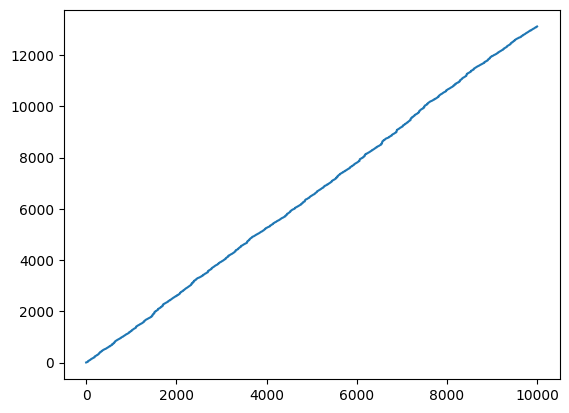

In [13]:
import json
import time
import matplotlib.pyplot as plt
import numpy as np
# main loop
iterations = 10000
agent = DrunkAgent()
dungeon.reset()
total_reward = np.zeros(iterations) # Score keeping
for step in range(iterations):
    old_state = dungeon.state # Store current state
    action = agent.get_next_action(old_state) # Query agent for the next action
    new_state, reward = dungeon.take_action(action) # Take action, get new state and reward
    agent.update(old_state, new_state, action, reward) # Let the agent update internals
    if step == 0:
        total_reward[step] = reward
    else:
        total_reward[step] = total_reward[step-1] + reward # Keep score
    if step % 250 == 0: # Print out metadata every 100th iteration
        print(json.dumps({'step': step, 'total_reward': total_reward[step]}))

    time.sleep(0.0001) # Avoid spamming stdout too fast!

print("Final Q-table", agent.q_table)
plt.plot(total_reward)

Questo Plot e reward del drunk agent dopo aver fa tto 1000 iterazioni!

{"step": 0, "total_reward": 2.0}
{"step": 250, "total_reward": 578.0}
{"step": 500, "total_reward": 880.0}
{"step": 750, "total_reward": 1230.0}
{"step": 1000, "total_reward": 1762.0}
{"step": 1250, "total_reward": 2178.0}
{"step": 1500, "total_reward": 2442.0}
{"step": 1750, "total_reward": 2832.0}
{"step": 2000, "total_reward": 3144.0}
{"step": 2250, "total_reward": 3400.0}
{"step": 2500, "total_reward": 3658.0}
{"step": 2750, "total_reward": 3940.0}
{"step": 3000, "total_reward": 4196.0}
{"step": 3250, "total_reward": 4514.0}
{"step": 3500, "total_reward": 4836.0}
{"step": 3750, "total_reward": 5190.0}
{"step": 4000, "total_reward": 5442.0}
{"step": 4250, "total_reward": 5752.0}
{"step": 4500, "total_reward": 5998.0}
{"step": 4750, "total_reward": 6370.0}
{"step": 5000, "total_reward": 6804.0}
{"step": 5250, "total_reward": 7110.0}
{"step": 5500, "total_reward": 7360.0}
{"step": 5750, "total_reward": 7640.0}
{"step": 6000, "total_reward": 7894.0}
{"step": 6250, "total_reward": 8196.

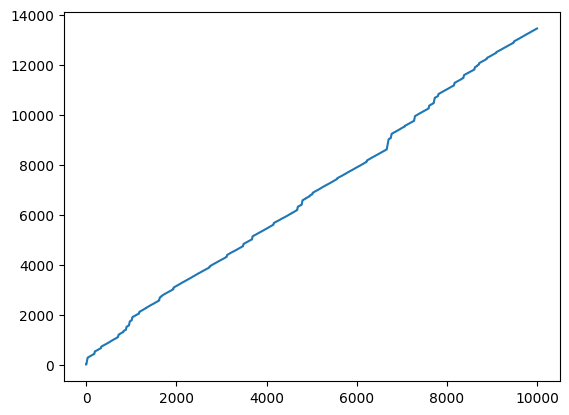

In [14]:
agent = Accountant()
dungeon.reset()
total_reward = np.zeros(iterations) # Score keeping
for step in range(iterations):
    old_state = dungeon.state # Store current state
    action = agent.get_next_action(old_state) # Query agent for the next action
    new_state, reward = dungeon.take_action(action) # Take action, get new state and reward
    agent.update(old_state, new_state, action, reward) # Let the agent update internals
    if step == 0:
        total_reward[step] = reward
    else:
        total_reward[step] = total_reward[step-1] + reward # Keep score
    if step % 250 == 0: # Print out metadata every 100th iteration
        print(json.dumps({'step': step, 'total_reward': total_reward[step]}))

    time.sleep(0.0001) # Avoid spamming stdout too fast!

print("Final Q-table", agent.q_table)
plt.plot(total_reward)

{"step": 0, "total_reward": 2.0}
{"step": 250, "total_reward": 386.0}
{"step": 500, "total_reward": 750.0}
{"step": 750, "total_reward": 1068.0}
{"step": 1000, "total_reward": 1390.0}
{"step": 1250, "total_reward": 1754.0}
{"step": 1500, "total_reward": 2058.0}
{"step": 1750, "total_reward": 2428.0}
{"step": 2000, "total_reward": 2770.0}
{"step": 2250, "total_reward": 3116.0}
{"step": 2500, "total_reward": 3526.0}
{"step": 2750, "total_reward": 3906.0}
{"step": 3000, "total_reward": 4310.0}
{"step": 3250, "total_reward": 4696.0}
{"step": 3500, "total_reward": 5146.0}
{"step": 3750, "total_reward": 5638.0}
{"step": 4000, "total_reward": 6208.0}
{"step": 4250, "total_reward": 6600.0}
{"step": 4500, "total_reward": 7050.0}
{"step": 4750, "total_reward": 7552.0}
{"step": 5000, "total_reward": 8170.0}
{"step": 5250, "total_reward": 8988.0}
{"step": 5500, "total_reward": 9606.0}
{"step": 5750, "total_reward": 10330.0}
{"step": 6000, "total_reward": 11012.0}
{"step": 6250, "total_reward": 115

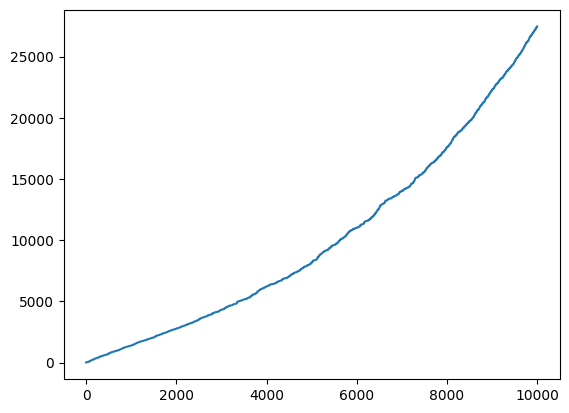

In [15]:
agent = Gambler(iterations=iterations)
dungeon.reset()
total_reward = np.zeros(iterations) # Score keeping
for step in range(iterations):
    old_state = dungeon.state # Store current state
    action = agent.get_next_action(old_state) # Query agent for the next action
    new_state, reward = dungeon.take_action(action) # Take action, get new state and reward
    agent.update(old_state, new_state, action, reward) # Let the agent update internals
    if step == 0:
        total_reward[step] = reward
    else:
        total_reward[step] = total_reward[step-1] + reward # Keep score
    if step % 250 == 0: # Print out metadata every 100th iteration
        print(json.dumps({'step': step, 'total_reward': total_reward[step]}))
    time.sleep(0.0001) # Avoid spamming stdout too fast!

print("Final Q-table", agent.q_table)
plt.plot(total_reward)